In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
import matplotlib.image as mpimg

This notebook repurposes code presented here: https://www.marksmath.org/visualization/orbits/CentralOrbit.html

# View on the show

<IPython.core.display.Javascript object>


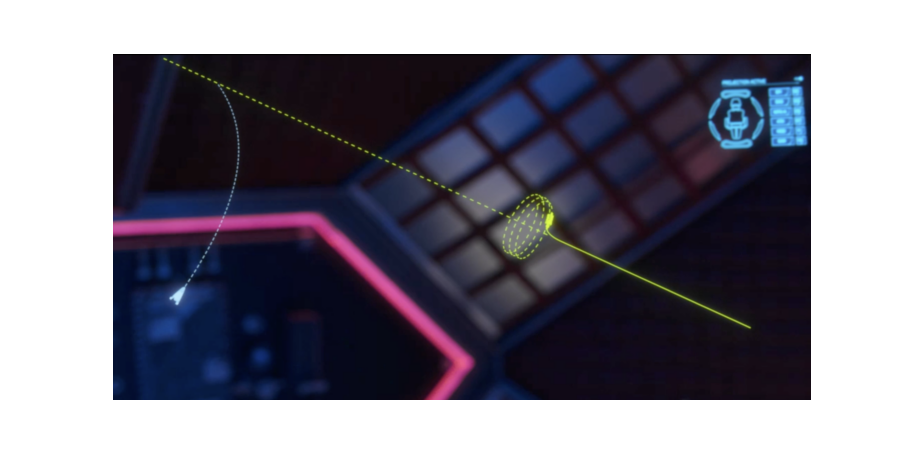

(-0.5, 2591.5, 1329.5, -0.5)

In [2]:
img=mpimg.imread('show_view.png')
plt.figure(figsize=(9,4.5))
plt.imshow(img,aspect='auto')
plt.axis('off')

# View from Razorback

In [3]:
# Parameters
G = .3
x0 = 0
y0 = 0
vx0 = 0
vy0 = 1000 # some initial velocity choice

# In the following definition of F, s is a state vector whose components represent the following:
#   s[0]: Horizontal or x position
#   s[1]: Vertical or y position
#   s[2]: Horizontal velocity
#   s[3]: Vertical velocity
# In general, F can depend upon time t as well. Although our F is independent of t, we still need to
# indicate that it is a possible variable.

def F(s,t): 
    f = [s[2],s[3],
         G*np.sin(t*np.pi/180),
         G*np.cos(t*np.pi/180),]
    return f

t = np.arange(0,1000)

# Solve the differential equation to get the velocity and distance components
solution = odeint(F,[x0,y0,vx0,vy0],t)

x = solution[:,0]
y = solution[:,1]

In [4]:
bkg=mpimg.imread('tess_bkg.jpg')
fig, ax = plt.subplots()
plt.imshow(bkg,extent=((-100, 18000,-100, 1e6)),cmap='gray')
plt.gca().set_aspect('auto', adjustable='box')


xdata, ydata = [], []
ln, = plt.plot([], [], 'r.')

def init():
    ax.set_xlim(-100, 18000)
    ax.set_ylim(-100, 1e6)
    return ln,

def update(frame):
    xdata.append(x[frame])
    ydata.append(y[frame])
    ln.set_data(xdata, ydata)
    return ln,
ani = []
ani = FuncAnimation(fig, update, frames=np.arange(0,len(x)),init_func=init, blit=True,interval=1)

<IPython.core.display.Javascript object>

# View from an initially co-moving observer

Relative velocity is initially 0.

<IPython.core.display.Javascript object>


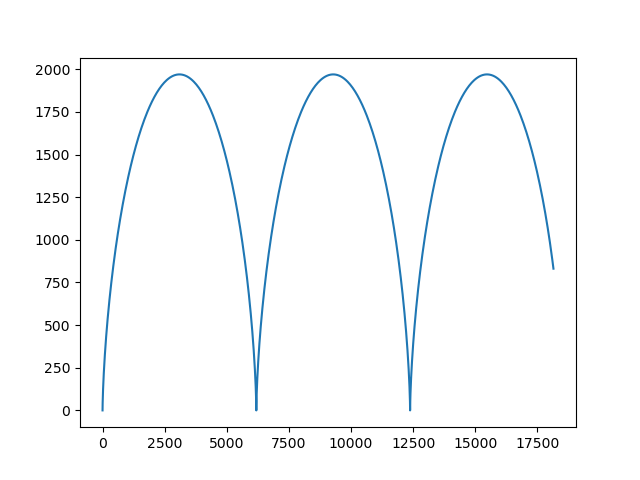

In [2]:
# Parameters
G = .3
x0 = 0
y0 = 0
vx0 = 0
vy0 = 0

def F(s,t): 
    f = [s[2],s[3],
    G*np.sin(t*np.pi/180),
    G*np.cos(t*np.pi/180),]
    return f

t = np.arange(0,1000)

# Solve it!
solution = odeint(F,[x0,y0,vx0,vy0],t)

x = solution[:,0]
y = solution[:,1]

plt.figure()
plt.plot(x,y)

<IPython.core.display.Javascript object>


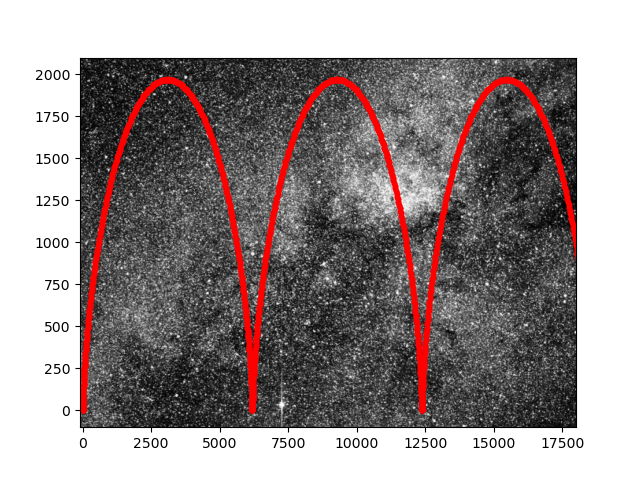

In [3]:
bkg=mpimg.imread('tess_bkg.jpg')
ind = np.argsort(x)
x = x[ind]
y = y[ind]
fig, ax = plt.subplots()
plt.imshow(bkg,extent=((-100, 18000,-100, 2100)),cmap='gray')
plt.gca().set_aspect('auto', adjustable='box')


xdata, ydata = [], []
ln, = plt.plot([], [], 'r.')

def init():
    ax.set_xlim(-100, 18000)
    ax.set_ylim(-100, 2100)
    return ln,

def update(frame):
    xdata.append(x[frame])
    ydata.append(y[frame])
    ln.set_data(xdata, ydata)
    return ln,
ani = []
ani = FuncAnimation(fig, update, frames=np.arange(0,len(x)),init_func=init, blit=True,interval=1)

# View from an inertial frame moving with the average $x$ velocity

Observer is centered on the origin of the circle which is describes the above motion

<IPython.core.display.Javascript object>


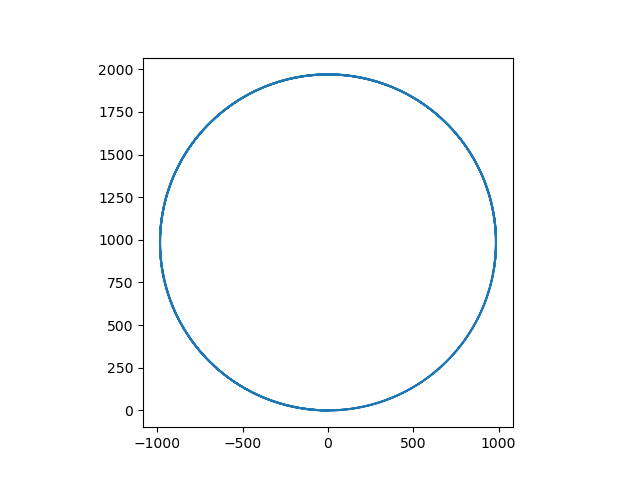

In [6]:
vx = solution[:,2]
vel = np.mean(vx[:360])
comover = -t.copy() * vel

x = solution[:,0]
y = solution[:,1]




plt.figure()
plt.plot(x + comover,y)
plt.gca().set_aspect('equal', adjustable='box')

In [8]:
bkg=mpimg.imread('tess_bkg.jpg')
ind = np.argsort(x)
x = x[ind]
y = y[ind]
fig, ax = plt.subplots()
plt.imshow(bkg,extent=((-1100, 1100,-100, 2100)),cmap='gray')
#plt.gca().set_aspect('auto', adjustable='box')


xdata, ydata = [], []
ln, = plt.plot([], [], 'r.')

def init():
    ax.set_xlim(-1100, 1100)
    ax.set_ylim(-100, 2100)
    return ln,

def update(frame):
    xdata.append(x[frame]+comover[frame])
    ydata.append(y[frame])
    ln.set_data(xdata, ydata)
    return ln,
ani = []
ani = FuncAnimation(fig, update, frames=np.arange(0,len(x)),init_func=init, blit=True,interval=1)

<IPython.core.display.Javascript object>